# ST2195 Coursework Project - Part 1

Please note that the explanation of my results is done in the report and here, I have explained my code throughout to what I am doing in each chunk.


## Part 1 (a)


### Importing and Installing Required Packages:

In [2]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scipy

In [2]:
from scipy.stats import norm
from scipy.stats import kde

setting up the working directory continuing from current directory that file is in to ensure that it works elsewhere:

In [3]:

# directory of the currently running script is:
script_dir = os.path.dirname(os.path.abspath("TarushiGangwar_220460295_CW_Part1_python.ipynb"))
# !! NOTE: currently the name of the file is "TarushiGangwar_220460295_CW_Part1_python.ipynb" which must be changed if the name of the file is changed!!

# setting the working directory to the script directory so that it runs regardless of where the file is
os.chdir(script_dir)

# checking if the working directory has been set correctly by printing the current wd
print(os.getcwd())

/Users/sushii/SIM_UOL/Year 2 acads/Programming for DS/Coursework/FINAL


### Setting the Probability Density Function (pdf) and Defining Values

In [3]:
# setting probability density function (pdf) as given:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

# defining values:

x0 = 0
N_a = 10000
s_a = 1

iterations = N_a
initial_value = x0


### Stimulating random number x∗
let mean = xi_minus_1 = 0

In [4]:
import numpy as np

# setting mean (xi_minus_1) and standard deviation (s):
xi_minus_1 = 0  
s_a = 1

# to get x* from the normal distribution:
x_star = np.random.normal(xi_minus_1, s_a)

print("Simulated random number x*:", x_star) # to print the stimulated number


Simulated random number x*: 1.0105752891598048


### Computing the ratio, r(x∗, xi−1)

In [5]:
# pdf from above
def f(x):
    return 0.5 * np.exp(-np.abs(x))

x_star = 1  
xi_minus_1 = 0

# to calculate the ratio r(x*, xi_minus_1):
ratio = f(x_star) / f(xi_minus_1)

# to print the ratio:
print("Ratio r(x*, xi_minus_1):", ratio)


Ratio r(x*, xi_minus_1): 0.36787944117144233


Note that:
    acceptance ratio = r(x*, xi−1)

### Generating a Random Number u

In [6]:
u = np.random.uniform(0, 1, 1) # using a uniform

print("u =", u)

u = [0.98790618]


### Generating Samples and Plotting the Required Graphs (Histogram and Kernel Density Plot):

In [7]:
# pdf as defined above:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [8]:
# Random Walk Metropolis algorithm

def random_walk_metropolis_a(iterations, initial_value, proposal_std_dev):
    samples = [initial_value]

    for _ in range(iterations):
        current_sample = samples[-1]
        
        # new sample from a symmetric random walk to allow algorithm to find valies of interest:
        proposed_sample = np.random.normal(current_sample, proposal_std_dev)
        
        # to calculate acceptance ratio using our pdf:
        acceptance_ratio = min(1, f(proposed_sample) / f(current_sample))
        
        # accept/reject proposed sample based on acceptance ratio:
        if np.random.rand() < acceptance_ratio:
            samples.append(proposed_sample)
        else:
            samples.append(current_sample)

    return np.array(samples)


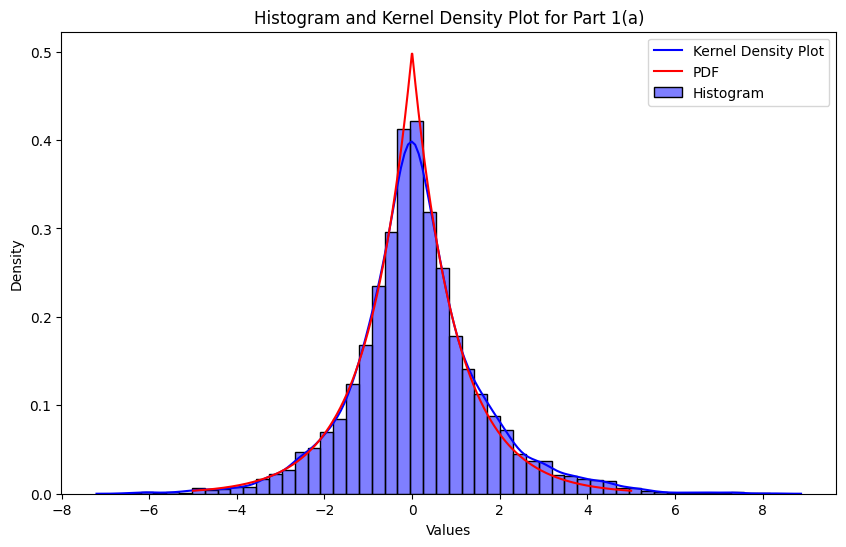

In [9]:
# Generate samples using Random Walk Metropolis algorithm
samples = random_walk_metropolis_a(N_a, initial_value, s_a)

# plotting the results:

# to plot histogram:
plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=50, color='blue', stat='density', alpha=0.5, label='Histogram')

# to plot kernel density on the same graph:
sns.kdeplot(samples, color='blue', label='Kernel Density Plot')
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, f(x_values), 'r', label='PDF')

plt.legend()
plt.title('Histogram and Kernel Density Plot for Part 1(a)')
plt.xlabel('Values')
plt.ylabel('Density')

plt.show()

## Part 1 (b)

importing required packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Re-defining pdf

In [51]:
# pdf as defined above:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

Generating multiple sequences/chains of x0,...,xN, using different initial values for j = 1,2,...,J

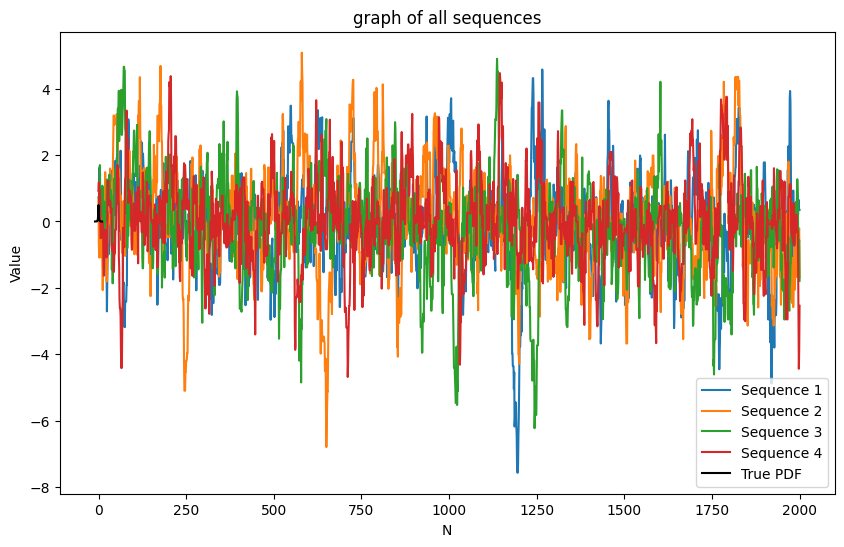

In [52]:
# Seting the parameters

N_b = 2000
J = 4 

# x0 = initial value
num_samples_per_chain = N_b
num_chains = J


# Random Walk Metropolis algorithm:

def random_walk_metropolis(initial_value, num_samples):
    current_value = initial_value
    samples = [current_value]

    for _ in range(num_samples):
        # Propose a new value from a normal distribution
        proposal = np.random.normal(current_value, 1)
        
        # Calculate acceptance probability
        acceptance_ratio = min(1, f(proposal) / f(current_value))

        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            current_value = proposal

        samples.append(current_value)

    return np.array(samples)


# Run the Random Walk Metropolis algorithm for each chain
all_samples = []
for _ in range(J):
    initial_value = np.random.rand()
    samples = random_walk_metropolis(initial_value, N_b)
    all_samples.append(samples)

# Plot the samples and true PDF for comparison
plt.figure(figsize=(10, 6))

# Plot each chain separately
for j, samples in enumerate(all_samples):
    plt.plot(samples, label=f'Sequence {j + 1}')

# Plot the true PDF for comparison
x_range = np.linspace(-10, 10, 1000)
plt.plot(x_range, f(x_range), 'k-', label='True PDF')

plt.xlabel('N')
plt.ylabel('Value')
plt.title('graph of all sequences')
plt.legend()
plt.show()


### Defining and Computing Mj:

In [53]:
for j, samples in enumerate(all_samples):
    Mj = (1 / N_b) * np.sum(samples)
    print(f"Sample Mean for Chain {j + 1}: {Mj:.4f}")


Sample Mean for Chain 1: -0.1158
Sample Mean for Chain 2: 0.0137
Sample Mean for Chain 3: -0.2020
Sample Mean for Chain 4: 0.0116


### Defining and Computing Vj:

In [54]:
for i, samples in enumerate(all_samples):
    Vj = (1/N_b) * np.sum((samples - Mj)**2)
    print(f"within sample variance for Chain {i + 1}: {Vj:.4f}")

within sample variance for Chain 1: 1.9559
within sample variance for Chain 2: 2.2299
within sample variance for Chain 3: 2.0280
within sample variance for Chain 4: 1.5641


### Defining and Computing the Overall Within Sample Variance, W:

Through research I have understood that, W provides us with an indication of how much the individual chains fluctuate around their respective sample means



In [55]:
# to calculate overall 'within sample variance', W:

W = (1/J) * np.sum(Vj)

print(f"Overall Within-Sample Variance,W: {W:.4f}") # to set to 4 decimal places


Overall Within-Sample Variance,W: 0.3910


### Defining and Computing the Overall Sample Mean, M:

In [56]:
# to calculate overall sample mean, M:

M = (1/J)* np.sum(Mj)

print(f"Overall Sample Mean, M: {M:.4f}") # set to 4 decimal places


Overall Sample Mean, M: 0.0029


### Defining and Computing the between sample variance, B:

In [57]:
# Calculate squared differences for each chain's sample mean
squared_differences = [(Mj - M)**2 for samples in all_samples]

# Calculate between-sample variance (B)
B = (1/(J-1)) * sum(squared_differences)

print(f"Between-Sample Variance, B: {B:.4f}")  # set to 4 decimal places

Between-Sample Variance, B: 0.0001


### Computing the R hat value:

In [58]:
# to calculate R hat value:

# Calculate R-hat using the provided formula
R_hat = np.sqrt((B + W) / W)

print(f"R hat: {R_hat:.4f}")  # set to 4 decimal places

R hat: 1.0001


Since my r_hat value is close to 1, it indicates convergence of the algorithm and since it is smaller than 1.05, it is a desired value.

### Plotting the Graph of 'R_hat' Against s Values

Firstly, we start off by stating the pdf (again and defining the parameters. I have also added an empty array that will store the r hat values that we will be generating.

In [11]:
# re-defining the pdf and the parameters (for convenience)
def f(x):
    return 12 * np.exp(-abs(x))

N_b = 2000
J = 4
s_values = np.linspace(0.001, 1, num=100) # 100 s values between 0.001 and 1


Rhat_values = np.zeros(len(s_values)) # a zero-array (empty) to store r hat values from later



In the following code, I have defined two functions. One to to generate samples using the Metropolis-Hastings algorithm and another to compute the required statistics values (the Mj, Vj, M, W, B and R hat). After which I used a for loop to iterate the r hat values over the 100 s values.

In [16]:

# function to generate samples using the given Metropolis-Hastings method / steps
def algorithm(N_b, s, J):
    chains = [] # empty list to store the chains later
    for j in range(J):
        chain = np.zeros(N_b)
        chain[0] = np.random.normal(0, 1) # using normal distribution
        for i in range(1, N_b):
            x_star = np.random.normal(chain[i - 1], s)
            r = f(x_star) / f(chain[i - 1]) # using the pdf
            if np.random.uniform() < r:
                chain[i] = x_star
            else:
                chain[i] = chain[i - 1]
        chains.append(chain) # appending the values to the empty list
    return chains

# the function below computes the R hat value by iterating it over the 100 s values
def iterations(chains):
    sample_means = np.zeros(len(chains)) # for Mj
    within_sample_variances = np.zeros(len(chains)) # for Vj
    
    # the for-loop below iterates the values of Mj and Vj over the the iterations
    for i, chain in enumerate(chains):
        sample_means[i] = np.mean(chain) 
        within_sample_variances[i] = np.mean((chain - sample_means[i])**2)
    
    overall_sample_mean = np.mean(sample_means) # for M
    overall_within_sample_variance = np.mean(within_sample_variances) # for W
    between_sample_variance = np.mean((sample_means - overall_sample_mean)**2) # for B
    
    # I chose to write the whole name instead of the letters M, W or B etc for more clarity
    
    Rhat = (between_sample_variance / overall_within_sample_variance + overall_within_sample_variance) / overall_within_sample_variance
    return Rhat


# generating the r hat values for all the iterations and appending them to the array i made before.
for i, s in enumerate(s_values):
    chains = algorithm(N_b, s, J)
    Rhat_values[i] = iterations(chains)


There are two plots below. The first plot is the required plot for "best" r hat values between 1 and 1.05. The second plot is for r hat values 0 to 50 to help see the chape of the curve better which is downward sloping with a r hat = 1 asymptote.

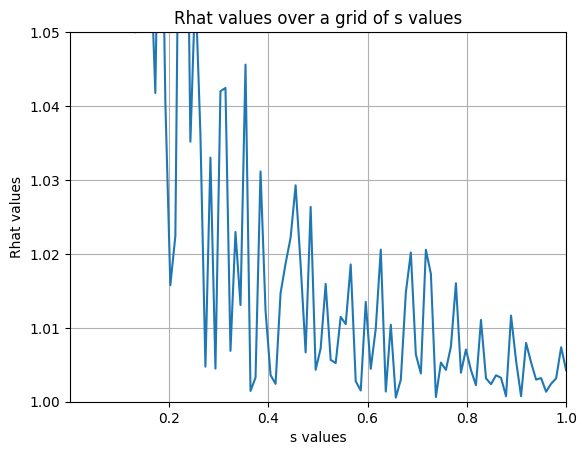

In [17]:

# plotting the Rhat values against the s values
plt.plot(s_values, Rhat_values)
plt.xlabel('s values')
plt.ylabel('Rhat values')
plt.title('Rhat values over a grid of s values')
plt.xlim(0.001, 1)
plt.ylim(1, 1.05) # for given range, close to 1 and below 1.05 
plt.grid()
plt.show()


Below, I have the same graph as above but on a different scale to show the shape of the graph. It is a downward-sloping 

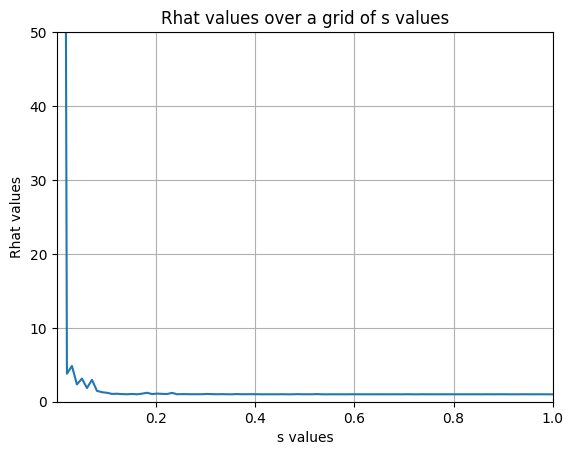

In [12]:
# plotting the Rhat values on a different scale
plt.plot(s_values, Rhat_values)
plt.xlabel('s values')
plt.ylabel('Rhat values')
plt.title('Rhat values over a grid of s values')
plt.xlim(0.001, 1) # over s values
plt.ylim(0, 50) # changed y-axis scale
plt.grid()
plt.show()


### The following code is wrong !!
Orinigally, I did the following code in an attept to iterate the r_hat values over the 100 s values with the full calculations of M,W,B and Rhat etc inside unlike using codes to do it like I did above. I even set NaN values and tried my best to ensure that the values are iterated correctly. However, upon plotting the graph, I realised that the shape did not look right which is why I did it again multiple times to finally understand what was wrong, fix it, and get the right plot.

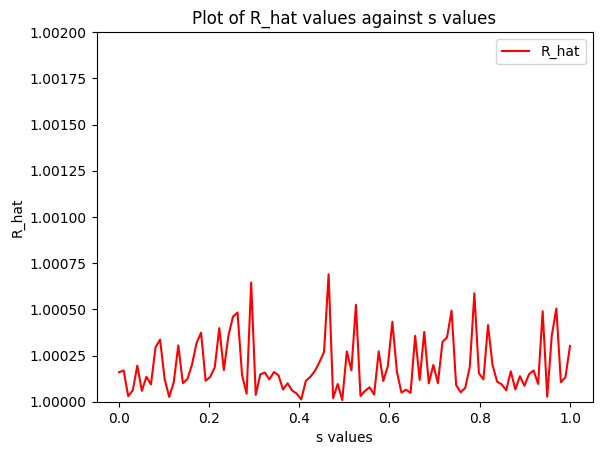

In [18]:
# re-defining (for convenience)
N_b = 2000
J = 4

# generating the s values
s_values = np.linspace(0.001, 1, 100)

# creating lists to store results
R_hat_values = []


# for Loop to generate required values for s and R_hat
for s in s_values:
    sequences = [np.random.normal(loc=0, scale=s, size=N_b) for _ in range(J)]  # using normal distribution
    
    Mj = np.mean(sequences, axis=1)
    Vj = np.mean((sequences - Mj[:, np.newaxis])**2, axis=1)
    
    # calculating within sample variance W
    W = np.mean(Vj)
    # computing sample mean M
    M = np.mean(Mj)
    # computing Between-Sample Variance, B
    B = np.mean((Mj - M)**2)
    
    # computing r value
    if W != 0:
        R_hat = np.sqrt((B + W) / W)
    else:
        R_hat = np.nan  # set to NaN for values that are undefined (division by zero)
        
   # append values to erlier-created lists
    R_hat_values.append(R_hat)

    
# to plot R_hat values against s values (wrong plot)
plt.plot(s_values, R_hat_values, label="R_hat", color="red")
plt.xlabel("s values")
plt.ylabel("R_hat")
plt.title("Plot of R_hat values against s values") 
plt.ylim(1, 1.002)  # setting y-axis limits to only show R_hat values in range
plt.legend()
plt.show() # to make plot visible
